In [8]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
plt.rc('figure', figsize=(8, 5))

In [9]:
def load_file(filename):
    return np.loadtxt(filename, delimiter=" ", usecols=(1,2), dtype='int32', skiprows=6, comments='EOF')

def get_distances(points):
    return np.array([[distance.euclidean(points[x], points[y])
                     for x in range(len(points))] for y in range(len(points))])
    
def init_cycles(points, distances):
    cycle1, cycle2 = [], []
    start_point = np.random.randint(0, len(points))
    cycle1.append(start_point)
    
    start_point2 = np.argmax(distances[start_point, :])
    cycle2.append(start_point2)
    
    remaining = list(range(len(points)))
    remaining.remove(start_point)
    remaining.remove(start_point2)
    
    return cycle1, cycle2, remaining

def score_cycles(distances, remaining , cycle):
    scores = np.array([[distances[cycle[c - 1], r] +  distances[cycle[c], r] - 
                       distances[cycle[c - 1], cycle[c]] for c in range(len(cycle))] for r in remaining])
    return scores        

In [10]:
def display_points(points):
    plt.scatter(points[:, 0], points[:, 1])
    plt.show()
    
def draw_path(points, cycle1, cycle2, save_file=None):
    cycle1.append(cycle1[0])
    cycle2.append(cycle2[0])
    
    c1 = np.array(points[cycle1, :])
    c2 = np.array(points[cycle2, :])
    
    plt.scatter(points[:, 0], points[:, 1], color='black')
    
    plt.plot(c1[:, 0], c1[:, 1], color='blue')
    plt.plot(c2[:, 0], c2[:, 1], color='red')
    if save_file is not None:
        plt.savefig(save_file)
    plt.show()
    del cycle1[-1]
    del cycle2[-1]


def cycle_lenght(distances, cycle):
    cycle.append(cycle[0])
    dist = sum(distances[cycle[i], cycle[i+1]] for i in range(len(cycle) - 1))
    cycle = cycle[:-1]
    return dist

In [15]:
def greedy_near(points, distances):
    cycle1, cycle2, remaining = init_cycles(points, distances)

    while len(remaining) > 0:
        for cycle in [cycle1, cycle2]:
            point = remaining[np.argmin(distances[cycle[-1], remaining])]
            cycle.append(point)
            remaining.remove(point)

    return cycle1, cycle2

def greedy_cycle(points, distances):
    cycle1, cycle2, remaining = init_cycles(points, distances)
    
    point = remaining[np.argmin(distances[cycle1[-1], remaining])]
    cycle1.append(point)
    remaining.remove(point)
    point = remaining[np.argmin(distances[cycle2[-1], remaining])]
    cycle2.append(point)
    remaining.remove(point)

    while len(remaining) > 0:
        for cycle in [cycle1, cycle2]:
            score = score_cycles(distances, remaining, cycle)
            best_point, best_insert = np.unravel_index(np.argmin(score), score.shape)
            cycle.insert(best_insert, remaining[best_point])
            remaining.remove(remaining[best_point])

    return cycle1, cycle2

def regreat_method(points, distances):
    cycle1, cycle2, remaining = init_cycles(points, distances)
    
    point = remaining[np.argmin(distances[cycle1[-1], remaining])]
    cycle1.append(point)
    remaining.remove(point)
    point = remaining[np.argmin(distances[cycle2[-1], remaining])]
    cycle2.append(point)
    remaining.remove(point)
    
    while len(remaining) > 0:
        for cycle in [cycle1, cycle2]:
            score = score_cycles(distances, remaining, cycle)
            regret = np.diff(np.partition(score, 1)[:,:2]).reshape(-1)
            
            weight = 1.7 * np.min(score, axis=1) - regret
            best_point = np.argmin(weight)
            best_insert = np.argmin(score[best_point])
            cycle.insert(best_insert, remaining[best_point])
            remaining.remove(remaining[best_point])
    
    return cycle1, cycle2

[56, 6, 8, 86, 50, 60, 24, 80, 68, 72, 49, 43, 1, 53, 39, 63, 67, 84, 38, 29, 95, 77, 51, 4, 36, 32, 75, 12, 94, 81, 47, 99, 70, 40, 13, 2, 45, 28, 33, 82, 54, 11, 19, 74, 18, 52, 78, 87, 15, 69]


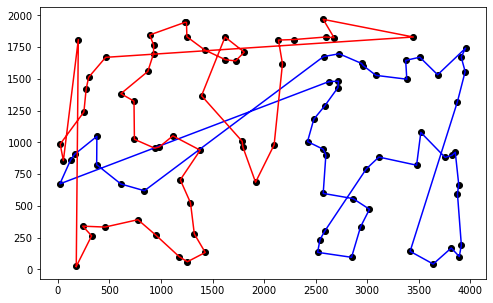

File:  kroA100.tsp 
Heuristic:  greedy_near 
Path lenght: 31917.181784899665
[18, 65, 25, 64, 3, 96, 55, 74, 89, 48, 5, 62, 91, 7, 41, 79, 30, 88, 94, 75, 12, 81, 0, 46, 97, 22, 90, 44, 31, 10, 14, 16, 20, 73, 58, 71, 9, 83, 35, 98, 37, 23, 17, 87, 93, 21, 69, 15, 52, 78]


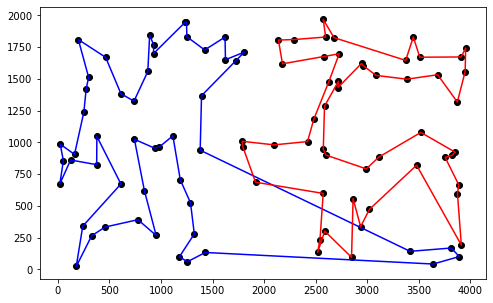

File:  kroA100.tsp 
Heuristic:  greedy_cycle 
Path lenght: 29136.692730989635
[42, 45, 26, 34, 85, 61, 59, 22, 44, 90, 97, 76, 19, 11, 56, 50, 60, 68, 39, 53, 63, 1, 72, 43, 49, 38, 32, 36, 4, 95, 77, 51, 29, 84, 67, 80, 24, 86, 6, 8, 54, 82, 33, 28, 13, 47, 99, 70, 40, 2]


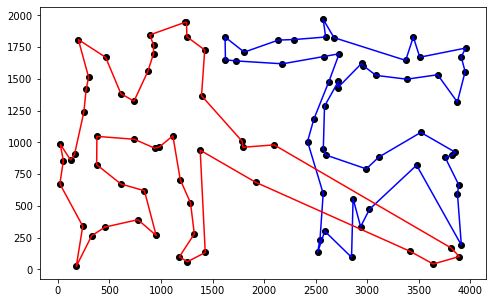

File:  kroA100.tsp 
Heuristic:  regreat_method 
Path lenght: 28387.072375663145
[97, 90, 44, 22, 59, 61, 76, 19, 11, 26, 85, 34, 56, 6, 8, 86, 50, 60, 24, 80, 68, 63, 39, 53, 1, 66, 27, 92, 57, 0, 62, 5, 48, 89, 9, 83, 71, 46, 91, 7, 41, 88, 30, 79, 55, 96, 74, 18, 3, 25]


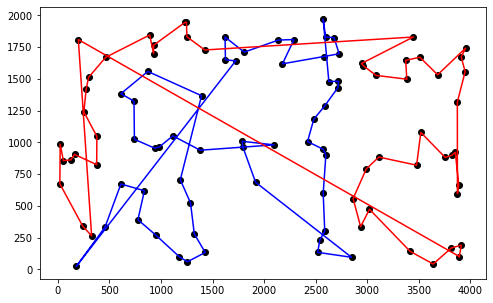

File:  kroB100.tsp 
Heuristic:  greedy_near 
Path lenght: 32402.511379063562
[44, 45, 42, 2, 28, 22, 97, 90, 46, 31, 10, 9, 83, 89, 62, 5, 48, 0, 91, 7, 41, 88, 30, 79, 74, 55, 96, 3, 64, 25, 65, 18, 52, 15, 69, 21, 93, 87, 78, 17, 23, 37, 98, 35, 71, 20, 73, 58, 16, 14]


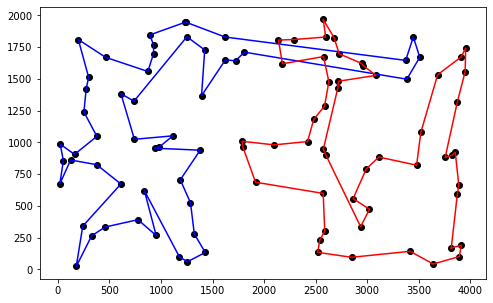

File:  kroB100.tsp 
Heuristic:  greedy_cycle 
Path lenght: 27419.767901074723
[12, 36, 4, 51, 77, 95, 47, 99, 40, 70, 13, 2, 42, 45, 26, 34, 85, 61, 59, 16, 58, 73, 19, 11, 56, 86, 6, 8, 54, 82, 33, 28, 29, 38, 84, 67, 72, 49, 43, 80, 66, 68, 63, 39, 53, 1, 81, 94, 75, 32]


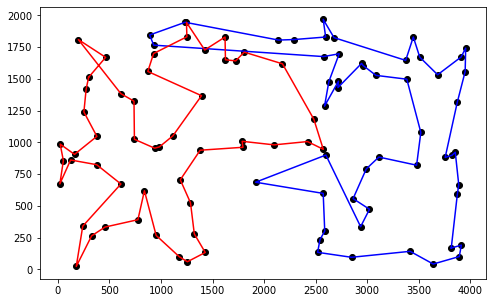

File:  kroB100.tsp 
Heuristic:  regreat_method 
Path lenght: 27359.343590035107


In [13]:
from scipy.spatial import distance
for file in ['kroA100.tsp', 'kroB100.tsp']:
    points = load_file("kroA100.tsp")
    distances = get_distances(points)
    for heuristic in [greedy_near, greedy_cycle, regreat_method]:
        cycle1, cycle2 = heuristic(points, distances)
        print(cycle1)
        heuristic_name = [name for name in globals() if globals()[name] is heuristic][0]
        draw_path(points, cycle1, cycle2, file + "_" + heuristic_name + ".jpg")
        print("File: ", file, "\nHeuristic: ", heuristic_name,
              "\nPath lenght:", cycle_lenght(distances, cycle1) + cycle_lenght(distances, cycle2))

0
10
20
30
40
50
60
70
80
90
('greedy_near', 'kroA100.tsp') 27950.075319288877


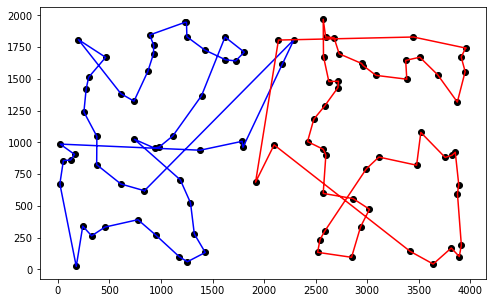

('greedy_cycle', 'kroA100.tsp') 26308.885271151106


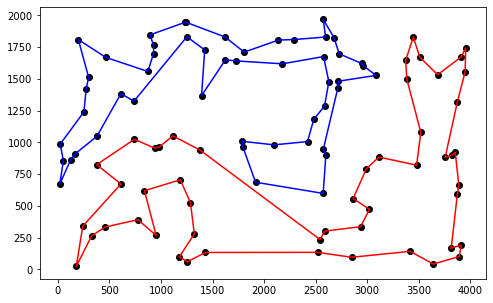

('regreat_method', 'kroA100.tsp') 23998.855996872047


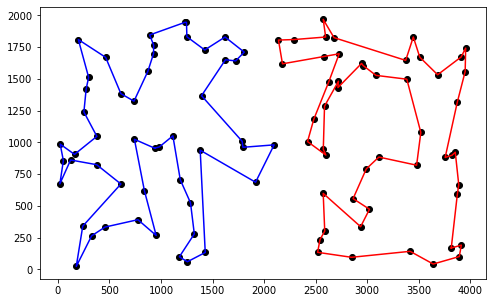

('greedy_near', 'kroB100.tsp') 27212.388265507965


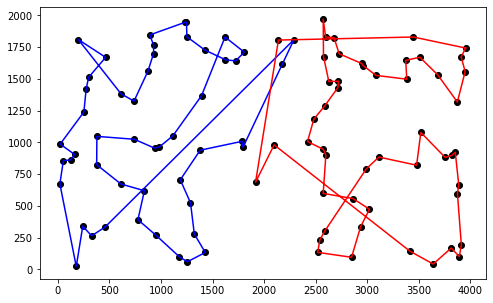

('greedy_cycle', 'kroB100.tsp') 26308.885271151106


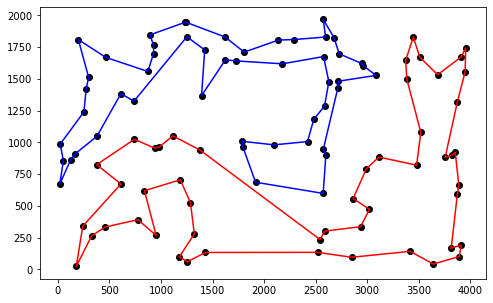

('regreat_method', 'kroB100.tsp') 24159.154861037678


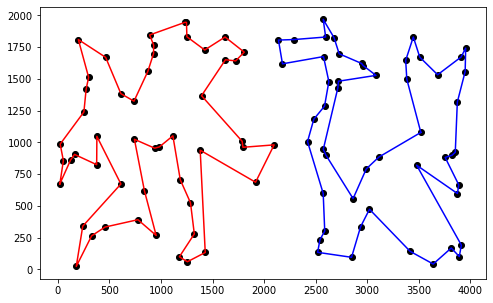

,greedy_near,greedy_cycle,regreat_method,greedy_near,greedy_cycle,regreat_method
,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,32743.736015,28894.103399,27258.872407,32479.803282,28510.585962,27687.043391
std,1743.394285,900.899774,1722.295632,2163.619086,1104.434603,1405.117750
min,27950.075319,26308.885271,23998.855997,27212.388266,26308.885271,24159.154861
25%,31985.783995,28751.762604,25246.411817,31902.336002,27353.828416,27359.343590
50%,33078.984853,28894.875224,28121.401948,33206.905319,28828.671704,28201.507256
75%,34015.533341,29688.615444,28453.013172,34037.957119,29669.085229,28453.013172
max,35341.300624,29971.530470,30189.625596,35341.300624,29981.097117,29408.701184


In [14]:
from scipy.spatial import distance
results = {
    ('greedy_near', 'kroA100.tsp')  : [],
    ('greedy_cycle', 'kroA100.tsp') : [],
    ('regreat_method', 'kroA100.tsp'): [],
    ('greedy_near', 'kroB100.tsp')  : [],
    ('greedy_cycle', 'kroB100.tsp') : [],
    ('regreat_method', 'kroB100.tsp'): [], 
}
min_cycles = {
    ('greedy_near', 'kroA100.tsp')  : [None, None],
    ('greedy_cycle', 'kroA100.tsp') : [None, None],
    ('regreat_method', 'kroA100.tsp'): [None, None],
    ('greedy_near', 'kroB100.tsp')  : [None, None],
    ('greedy_cycle', 'kroB100.tsp') : [None, None],
    ('regreat_method', 'kroB100.tsp'): [None, None], 
}
for x in range(100):
    if x % 10 == 0: 
        print(x)
    for file in ['kroA100.tsp', 'kroB100.tsp']:
        points = load_file("kroA100.tsp")
        distances = get_distances(points)
        for heuristic in [greedy_near, greedy_cycle, regreat_method]:
            heuristic_name = [name for name in globals() if globals()[name] is heuristic][0]
            cycle1, cycle2 = heuristic(points, distances)
            cycles_len = cycle_lenght(distances, cycle1) + cycle_lenght(distances, cycle2)
            if min_cycles[(heuristic_name, file)][0] is None or min_cycles[(heuristic_name, file)][0] > cycles_len:
                min_cycles[(heuristic_name, file)][0] = cycles_len
                min_cycles[(heuristic_name, file)][1] = [cycle1, cycle2]
            results[(heuristic_name, file)].append(cycles_len)
for key, value in min_cycles.items():
    print(key, value[0])
    draw_path(points, value[1][0], value[1][1], key[1] + "_" + key[0] + ".jpg")
pd.DataFrame(results).describe()            